In [1]:
import geopandas as gpd
import pandas as pd
import sqlite3
import folium
import branca.colormap as cm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lê o arquivo GeoJSON
itbi = gpd.read_file('dados_itbi_venal.geojson')

In [3]:
itbi.rename(columns={'preco_m2_medio': 'preco_m2_itbi'}, inplace=True)
itbi.head()

,CD_SETOR,preco_m2_itbi,num_imoveis,geometry
0,355030801000001P,2673.621557,166,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5..."
1,355030801000002P,1859.473498,371,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5..."
2,355030801000003P,2238.769867,126,"POLYGON ((-46.56619 -23.56605, -46.56632 -23.5..."
3,355030801000004P,2172.065809,54,"POLYGON ((-46.56876 -23.56856, -46.56863 -23.5..."
4,355030801000005P,2351.617756,93,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5..."


In [4]:
iptu = pd.read_excel('dados/valores_sc.xlsx')

In [5]:
iptu.rename(columns={'id_setor_censitario': 'CD_SETOR', 'valor_construcao_medio' : 'preco_m2_iptu'}, inplace=True)
iptu.head()

,CD_SETOR,unidades,valor_terreno_medio,preco_m2_iptu,area_construida_media,area_terreno_media
0,355030801000001P,220,1954.426230,1921.486339,171.262295,188.732240
1,355030801000002P,838,1693.710145,1908.429952,369.101449,217.405797
2,355030801000003P,175,1794.658228,1922.240506,181.170886,205.917722
3,355030801000004P,130,1676.136364,1927.920455,198.147727,260.306818
4,355030801000005P,184,1929.859259,1912.992593,208.451852,260.622222


In [6]:
conn = sqlite3.connect('dados_final.db')
query = "SELECT * FROM dados_final"
qa = pd.read_sql_query(query, conn)
conn.close()

In [7]:
qa.rename(columns={'setor': 'CD_SETOR', 'preco_medio_m2':'preco_m2_qa'}, inplace=True)
qa.head()

,CD_SETOR,preco_m2_qa,quantidade_imoveis,maior_preco_m2,menor_preco_m2,lat,lon
0,355030801000005P,4814.814815,1,4814.814815,4814.814815,-23.571521,-46.570585
1,355030801000074P,5175.438596,1,5175.438596,5175.438596,-23.577912,-46.572691
2,355030801000104P,9948.305448,6,12000.000000,8928.571429,-23.556107,-46.580224
3,355030801000131P,5672.713530,2,6530.612245,4814.814815,-23.570261,-46.571982
4,355030801000197P,9499.664333,14,11996.000000,8108.108108,-23.557752,-46.579734


# Dados lidos, juncao abaixo

In [8]:
qa = qa[qa['preco_m2_qa'] < 50000]

In [9]:
# 1. Seleciona as colunas de interesse em cada DataFrame
itbi_sel = itbi[['CD_SETOR', 'preco_m2_itbi']]
iptu_sel = iptu[['CD_SETOR', 'preco_m2_iptu']]
qa_sel = qa[['CD_SETOR', 'preco_m2_qa']]

In [10]:
# 2. Realiza as junções (merge) utilizando a coluna em comum 'CD_SETOR'
# Primeiro, junta ITBI com IPTU:
merged_df = pd.merge(itbi_sel, iptu_sel, on='CD_SETOR', how='inner')

merged2_df = pd.merge(itbi_sel, qa_sel, on='CD_SETOR', how='inner')


In [11]:
# 3. Exibe o DataFrame resultante
merged_df.head()

,CD_SETOR,preco_m2_itbi,preco_m2_iptu
0,355030801000001P,2673.621557,1921.486339
1,355030801000002P,1859.473498,1908.429952
2,355030801000003P,2238.769867,1922.240506
3,355030801000004P,2172.065809,1927.920455
4,355030801000005P,2351.617756,1912.992593


In [12]:
setores = gpd.read_file("dados\geo\SP_Malha_Preliminar_2022.shp")
sp = setores[setores["NM_MUN"] == "São Paulo"]
sp = sp.to_crs(epsg=4326)
sp.head()


<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\ggsna\AppData\Local\Temp\ipykernel_2876\3600661627.py:1: SyntaxWarning: invalid escape sequence '\g'
  setores = gpd.read_file("dados\geo\SP_Malha_Preliminar_2022.shp")


,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,NM_MICRO,CD_MESO,NM_MESO,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_CONCURB,NM_CONCURB,geometry
65763,355030801000001P,0.071797,3,Sudeste,35,São Paulo,3550308,São Paulo,355030801,Água Rasa,...,São Paulo,3515,Metropolitana de São Paulo,350001,São Paulo,3501,São Paulo,3550308,São Paulo/SP,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5..."
65764,355030801000002P,0.071902,3,Sudeste,35,São Paulo,3550308,São Paulo,355030801,Água Rasa,...,São Paulo,3515,Metropolitana de São Paulo,350001,São Paulo,3501,São Paulo,3550308,São Paulo/SP,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5..."
65765,355030801000003P,0.055681,3,Sudeste,35,São Paulo,3550308,São Paulo,355030801,Água Rasa,...,São Paulo,3515,Metropolitana de São Paulo,350001,São Paulo,3501,São Paulo,3550308,São Paulo/SP,"POLYGON ((-46.56619 -23.56605, -46.56632 -23.5..."
65766,355030801000004P,0.064905,3,Sudeste,35,São Paulo,3550308,São Paulo,355030801,Água Rasa,...,São Paulo,3515,Metropolitana de São Paulo,350001,São Paulo,3501,São Paulo,3550308,São Paulo/SP,"POLYGON ((-46.56876 -23.56856, -46.56863 -23.5..."
65767,355030801000005P,0.086820,3,Sudeste,35,São Paulo,3550308,São Paulo,355030801,Água Rasa,...,São Paulo,3515,Metropolitana de São Paulo,350001,São Paulo,3501,São Paulo,3550308,São Paulo/SP,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5..."


In [13]:
sp_filtrado = sp[['CD_SETOR', 'geometry']]
merged_final = merged_df.merge(sp_filtrado, on='CD_SETOR', how='left')
merged_final.head()

,CD_SETOR,preco_m2_itbi,preco_m2_iptu,geometry
0,355030801000001P,2673.621557,1921.486339,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5..."
1,355030801000002P,1859.473498,1908.429952,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5..."
2,355030801000003P,2238.769867,1922.240506,"POLYGON ((-46.56619 -23.56605, -46.56632 -23.5..."
3,355030801000004P,2172.065809,1927.920455,"POLYGON ((-46.56876 -23.56856, -46.56863 -23.5..."
4,355030801000005P,2351.617756,1912.992593,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5..."


In [14]:
merged2 = merged2_df.merge(sp_filtrado, on='CD_SETOR', how='left')
merged2.head()

,CD_SETOR,preco_m2_itbi,preco_m2_qa,geometry
0,355030801000005P,2351.617756,4814.814815,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5..."
1,355030801000074P,3289.269641,5175.438596,"POLYGON ((-46.57146 -23.57796, -46.57163 -23.5..."
2,355030801000104P,3083.763395,9948.305448,"POLYGON ((-46.57809 -23.55652, -46.57821 -23.5..."
3,355030801000131P,2195.012155,5672.713530,"POLYGON ((-46.56954 -23.56918, -46.56952 -23.5..."
4,355030801000197P,2336.977269,9499.664333,"POLYGON ((-46.57821 -23.55725, -46.57807 -23.5..."


In [15]:
print("Numero total de setores: {0}, numero de setores contemplados: {1}".format(len(sp), len(merged_final)))

Numero total de setores: 27592, numero de setores contemplados: 17271


In [16]:
# Calcula a diferença percentual entre o preco_m2_itbi e o preco_m2_iptu utilizando o IPTU como base
merged_final['diferenca_pct'] = ((merged_final['preco_m2_itbi'] - merged_final['preco_m2_iptu']) / 
                                 merged_final['preco_m2_iptu']) * 100

# Opcional: arredonda os valores para duas casas decimais
merged_final['diferenca_pct'] = merged_final['diferenca_pct'].round(2)

# Exibe as primeiras linhas para conferir o resultado
merged_final[['CD_SETOR', 'preco_m2_itbi', 'preco_m2_iptu', 'diferenca_pct']].head()


,CD_SETOR,preco_m2_itbi,preco_m2_iptu,diferenca_pct
0,355030801000001P,2673.621557,1921.486339,39.14
1,355030801000002P,1859.473498,1908.429952,-2.57
2,355030801000003P,2238.769867,1922.240506,16.47
3,355030801000004P,2172.065809,1927.920455,12.66
4,355030801000005P,2351.617756,1912.992593,22.93


In [17]:
# Função para categorizar o preço do ITBI
def categorizar_preco(preco):
    if preco <= 2000:
        return "0-2000"
    elif preco <= 4000:
        return "2001-4000"
    elif preco <= 6000:
        return "4001-6000"
    elif preco <= 8000:
        return "6001-8000"
    elif preco <= 10000:
        return "8001-10000"
    elif preco <= 12000:
        return "10001-12000"
    elif preco <= 14000:
        return "12001-14000"
    elif preco <= 16000:
        return "14001-16000"
    elif preco <= 18000:
        return "16001-18000"
    elif preco <= 20000:
        return "18001-20000"
    else:
        return "20001+"

# Aplicar a categorização com base no preço do ITBI
merged_final['faixa_preco'] = merged_final['preco_m2_itbi'].apply(categorizar_preco)

# Dicionário de cores para as categorias
cor_categorias = {
    "0-2000": "#f7fbff",       # Azul claro
    "2001-4000": "#deebf7",
    "4001-6000": "#c6dbef",
    "6001-8000": "#9ecae1",
    "8001-10000": "#6baed6",
    "10001-12000": "#4292c6",
    "12001-14000": "#2171b5",
    "14001-16000": "#084594",  # Azul escuro
    "16001-18000": "#08306b",  # Azul ainda mais escuro
    "18001-20000": "#041f50",  # Azul quase preto
    "20001+": "#000033"        # Preto com tonalidade azulada
}

# Criar o mapa base (aqui centralizado em São Paulo)
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=11)

# Adicionar os setores ao mapa
for _, row in merged_final.iterrows():
    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, row=row: {
            'fillColor': cor_categorias[row['faixa_preco']],
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7
        },
        tooltip=(
            f"Setor: {row['CD_SETOR']}<br>"
            f"Preço ITBI/m²: R$ {row['preco_m2_itbi']:.2f}<br>"
            f"Preço IPTU/m²: R$ {row['preco_m2_iptu']:.2f}<br>"
            f"Diferença: {row['diferenca_pct']:.2f}%"
        )
    ).add_to(m)

# Salvar o mapa como arquivo HTML
m.save("mapa_coropletico_completo.html")
print("Mapa coroplético salvo como 'mapa_coropletico_completo.html'. Abra-o no navegador para visualizar.")

Mapa coroplético salvo como 'mapa_coropletico_completo.html'. Abra-o no navegador para visualizar.


In [18]:
merged_final.to_csv('dados_final.csv', index=False)

In [19]:
# Calcula a diferença percentual entre o preco_m2_itbi e o preco_m2_iptu utilizando o IPTU como base
merged2_df['diferenca_pct'] = ((merged2_df['preco_m2_itbi'] - merged2_df['preco_m2_qa']) / 
                                 merged2_df['preco_m2_qa']) * 100

# Opcional: arredonda os valores para duas casas decimais
merged2_df['diferenca_pct'] = merged2_df['diferenca_pct'].round(2)

# Exibe as primeiras linhas para conferir o resultado
merged2_df[['CD_SETOR', 'preco_m2_itbi', 'preco_m2_qa', 'diferenca_pct']].head(), len(merged2_df)

(           CD_SETOR  preco_m2_itbi  preco_m2_qa  diferenca_pct
 0  355030801000005P    2351.617756  4814.814815         -51.16
 1  355030801000074P    3289.269641  5175.438596         -36.44
 2  355030801000104P    3083.763395  9948.305448         -69.00
 3  355030801000131P    2195.012155  5672.713530         -61.31
 4  355030801000197P    2336.977269  9499.664333         -75.40,
 1101)

In [20]:
merged2_df = merged2_df.sort_values(by='diferenca_pct', ascending=False)
merged2_df.head(10)

,CD_SETOR,preco_m2_itbi,preco_m2_qa,diferenca_pct
611,355030866000170P,57552.832229,6363.636364,804.40
624,355030866000264P,13307.470385,3706.896552,258.99
773,355030878000006P,17181.638511,5250.425804,227.24
780,355030878000056P,16366.576436,5793.895772,182.48
786,355030878000097P,9713.600048,3962.439362,145.14
48,355030809000030P,8325.565067,3888.955224,114.08
788,355030878000109P,9292.138241,4419.253993,110.26
656,355030869000065P,12028.269864,5833.135674,106.21
778,355030878000047P,7814.506528,3880.386311,101.38
175,355030826000070P,27822.092593,14023.144335,98.40


In [56]:
# Teste por bairros
bairros = gpd.read_file("dados/SIRGAS_SHP_distrito/SIRGAS_SHP_distrito.shp")
bairros.head()

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,13249456.11,13.249,"POLYGON ((333079.583 7408102.398, 333077.161 7..."
1,MOEMA,32,12,VILA MARIANA,MOE,9079516.47,9.080,"POLYGON ((331290.13 7392111.284, 331324.217 73..."
2,ARTUR ALVIM,5,21,PENHA,AAL,6505750.23,6.506,"POLYGON ((349420.638 7397694.618, 349423.468 7..."
3,IGUATEMI,33,30,SAO MATEUS,IGU,19434636.54,19.435,"POLYGON ((350874.784 7389641.837, 350875.63 73..."
4,ITAIM BIBI,35,11,PINHEIROS,IBI,10026327.68,10.026,"POLYGON ((327871.085 7386152.364, 327865.295 7..."


In [ ]:
bairros_filtrado = bairros[['ds_nome', 'geometry']]
bairros_filtrado.set_crs("EPSG:31983", inplace=True, allow_override=True)
bairros_filtrado = bairros_filtrado.to_crs(epsg=4326)
bairros_filtrado.head()


c:\Users\ggsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ds_nome,geometry
0,MANDAQUI,"POLYGON ((-46.63384 -23.42846, -46.63386 -23.4..."
1,MOEMA,"POLYGON ((-46.65315 -23.57266, -46.65282 -23.5..."
2,ARTUR ALVIM,"POLYGON ((-46.47498 -23.52403, -46.47495 -23.5..."
3,IGUATEMI,"POLYGON ((-46.46154 -23.59688, -46.46153 -23.5..."
4,ITAIM BIBI,"POLYGON ((-46.68733 -23.6261, -46.68738 -23.62..."


In [23]:
merged_final = gpd.GeoDataFrame(merged_final, geometry='geometry', crs="EPSG:4326")
joined = gpd.sjoin(merged_final, bairros_filtrado, how='inner', predicate='within')

In [24]:
if bairros_filtrado.crs != merged_final.crs:
    bairros_filtrado = bairros_filtrado.to_crs(merged_final.crs)

# 3. Realizar a junção espacial: associa cada setor ao bairro em que está contido
# Aqui, merged_final é o GeoDataFrame de setores e bairros_filtrado é o GeoDataFrame dos bairros.
joined = gpd.sjoin(merged_final, bairros_filtrado, how='inner', predicate='within')

# 4. Calcular a média do preco_m2_itbi por bairro (a partir dos setores)
avg_preco_por_bairro = joined.groupby('ds_nome')['preco_m2_itbi'].mean().reset_index()
avg_preco_por_bairro = avg_preco_por_bairro.rename(columns={'preco_m2_itbi': 'media_preco_m2'})

avg_preco_por_bairro_iptu = joined.groupby('ds_nome')['preco_m2_iptu'].mean().reset_index()
avg_preco_por_bairro_iptu = avg_preco_por_bairro_iptu.rename(columns={'preco_m2_iptu': 'media_preco_m2_iptu'})

# 5. Mesclar a média calculada com o GeoDataFrame de bairros para recuperar a geometria original dos bairros
avg_preco_por_bairro_geo = bairros_filtrado.merge(avg_preco_por_bairro, on='ds_nome')
avg_preco_por_bairro_geo = avg_preco_por_bairro_geo.merge(avg_preco_por_bairro_iptu, on='ds_nome')

# Agora, avg_preco_por_bairro_geo é um GeoDataFrame que contém:
# - ds_nome (nome do bairro)
# - geometry (a geometria original do bairro)
# - media_preco_m2 (média do preco_m2_itbi dos setores pertencentes ao bairro)
avg_preco_por_bairro_geo.head()

,ds_nome,geometry,media_preco_m2,media_preco_m2_iptu
0,MANDAQUI,"POLYGON ((-46.63384 -23.42846, -46.63386 -23.4...",2162.662936,1935.566054
1,MOEMA,"POLYGON ((-46.65315 -23.57266, -46.65282 -23.5...",6994.279480,3070.419043
2,ARTUR ALVIM,"POLYGON ((-46.47498 -23.52403, -46.47495 -23.5...",1720.852313,1739.608518
3,IGUATEMI,"POLYGON ((-46.46154 -23.59688, -46.46153 -23.5...",989.026435,1381.795707
4,ITAIM BIBI,"POLYGON ((-46.68733 -23.6261, -46.68738 -23.62...",6971.674606,2950.415844


In [25]:
avg_preco_por_bairro_geo["diff_pct"] = ((avg_preco_por_bairro_geo["media_preco_m2"] - avg_preco_por_bairro_geo["media_preco_m2_iptu"]) / avg_preco_por_bairro_geo["media_preco_m2_iptu"]) * 100
avg_preco_por_bairro_geo["diff_pct"] = avg_preco_por_bairro_geo["diff_pct"].round(2)
avg_preco_por_bairro_geo.head()

,ds_nome,geometry,media_preco_m2,media_preco_m2_iptu,diff_pct
0,MANDAQUI,"POLYGON ((-46.63384 -23.42846, -46.63386 -23.4...",2162.662936,1935.566054,11.73
1,MOEMA,"POLYGON ((-46.65315 -23.57266, -46.65282 -23.5...",6994.279480,3070.419043,127.80
2,ARTUR ALVIM,"POLYGON ((-46.47498 -23.52403, -46.47495 -23.5...",1720.852313,1739.608518,-1.08
3,IGUATEMI,"POLYGON ((-46.46154 -23.59688, -46.46153 -23.5...",989.026435,1381.795707,-28.42
4,ITAIM BIBI,"POLYGON ((-46.68733 -23.6261, -46.68738 -23.62...",6971.674606,2950.415844,136.29


In [26]:
# 1. Definir o centro e o nível de zoom do mapa (São Paulo, por exemplo)
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=11)

# 2. Criar uma escala de cores (colormap) baseada na média dos preços
min_val = avg_preco_por_bairro_geo['media_preco_m2'].min()
max_val = avg_preco_por_bairro_geo['media_preco_m2'].max()

# Aqui usamos um colormap do branca (você pode escolher outro, como 'YlOrRd', 'viridis', etc.)
colormap = cm.linear.YlOrRd_09.scale(min_val, max_val)
colormap.caption = 'Média Preço/m²'

# 3. Adicionar os polígonos dos bairros no mapa usando o GeoJSON
folium.GeoJson(
    avg_preco_por_bairro_geo,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['media_preco_m2']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['ds_nome', 'media_preco_m2', 'media_preco_m2_iptu', 'diff_pct'],
        aliases=['Bairro:', 'Média Preço ITBI/m²:', 'Média Preço IPTU/m²:', 'Diferença Percentual:'],
        localize=True,
        sticky=False
    )
).add_to(m)

# 4. Adicionar a legenda (colormap) ao mapa
colormap.add_to(m)

# 5. Salvar o mapa em um arquivo HTML
m.save("mapa_interativo_bairros.html")
print("Mapa interativo salvo como 'mapa_interativo_bairros.html'.")

Mapa interativo salvo como 'mapa_interativo_bairros.html'.


In [27]:
merged2.head()

,CD_SETOR,preco_m2_itbi,preco_m2_qa,geometry
0,355030801000005P,2351.617756,4814.814815,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5..."
1,355030801000074P,3289.269641,5175.438596,"POLYGON ((-46.57146 -23.57796, -46.57163 -23.5..."
2,355030801000104P,3083.763395,9948.305448,"POLYGON ((-46.57809 -23.55652, -46.57821 -23.5..."
3,355030801000131P,2195.012155,5672.713530,"POLYGON ((-46.56954 -23.56918, -46.56952 -23.5..."
4,355030801000197P,2336.977269,9499.664333,"POLYGON ((-46.57821 -23.55725, -46.57807 -23.5..."


In [28]:
merged2 = gpd.GeoDataFrame(merged2, geometry='geometry', crs="EPSG:4326")

In [29]:
joined2 = gpd.sjoin(merged2, bairros_filtrado, how='inner', predicate='within')
joined2.head()

,CD_SETOR,preco_m2_itbi,preco_m2_qa,geometry,index_right,ds_nome
0,355030801000005P,2351.617756,4814.814815,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5...",61,AGUA RASA
2,355030801000104P,3083.763395,9948.305448,"POLYGON ((-46.57809 -23.55652, -46.57821 -23.5...",61,AGUA RASA
3,355030801000131P,2195.012155,5672.713530,"POLYGON ((-46.56954 -23.56918, -46.56952 -23.5...",61,AGUA RASA
4,355030801000197P,2336.977269,9499.664333,"POLYGON ((-46.57821 -23.55725, -46.57807 -23.5...",61,AGUA RASA
5,355030802000015P,4539.753732,7978.723404,"POLYGON ((-46.70349 -23.55457, -46.70362 -23.5...",62,ALTO DE PINHEIROS


In [30]:
avg_diff_by_bairro_qa = joined2.groupby('ds_nome')['preco_m2_qa'].mean().reset_index()
avg_diff_by_bairro_qa = avg_diff_by_bairro_qa.rename(columns={'preco_m2_qa': 'media_preco_m2_qa'})

avg_diff_by_bairro_geo2 = bairros_filtrado.merge(avg_diff_by_bairro_qa, on='ds_nome')

avg_diff_by_bairro_geo2.head()

avg_diff_by_bairro_geo2 = avg_diff_by_bairro_geo2[avg_diff_by_bairro_geo2["ds_nome"] != "VILA ANDRADE"]


In [31]:
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=11)

min_val = avg_diff_by_bairro_geo2['media_preco_m2_qa'].min()
max_val = avg_diff_by_bairro_geo2['media_preco_m2_qa'].max()
colormap = cm.linear.RdYlGn_11.scale(min_val, max_val)
colormap.caption = 'Média Diferença % (ITBI vs QA)'

folium.GeoJson(
    avg_diff_by_bairro_geo2,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['media_preco_m2_qa']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['ds_nome', 'media_preco_m2_qa'],
        aliases=['Bairro:', 'Média Preço QA/m²:'],
        localize=True,
        sticky=False,
    )
).add_to(m)

colormap.add_to(m)

m.save("mapa_interativo_qa.html")
print("Mapa interativo salvo como 'mapa_interativo_qa.html'.")


Mapa interativo salvo como 'mapa_interativo_qa.html'.


In [43]:
merged_final = gpd.GeoDataFrame(merged_final, geometry='geometry', crs="EPSG:4326")
merged_final.head()

,CD_SETOR,preco_m2_itbi,preco_m2_iptu,geometry,diferenca_pct,faixa_preco
0,355030801000001P,2673.621557,1921.486339,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5...",39.14,2001-4000
1,355030801000002P,1859.473498,1908.429952,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5...",-2.57,0-2000
2,355030801000003P,2238.769867,1922.240506,"POLYGON ((-46.56619 -23.56605, -46.56632 -23.5...",16.47,2001-4000
3,355030801000004P,2172.065809,1927.920455,"POLYGON ((-46.56876 -23.56856, -46.56863 -23.5...",12.66,2001-4000
4,355030801000005P,2351.617756,1912.992593,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5...",22.93,2001-4000


In [64]:
bairros = gpd.read_file("dados/SIRGAS_SHP_distrito/SIRGAS_SHP_distrito.shp")
bairros_filtrado = bairros[['ds_nome', 'geometry']]
bairros_filtrado.head()

,ds_nome,geometry
0,MANDAQUI,"POLYGON ((333079.583 7408102.398, 333077.161 7..."
1,MOEMA,"POLYGON ((331290.13 7392111.284, 331324.217 73..."
2,ARTUR ALVIM,"POLYGON ((349420.638 7397694.618, 349423.468 7..."
3,IGUATEMI,"POLYGON ((350874.784 7389641.837, 350875.63 73..."
4,ITAIM BIBI,"POLYGON ((327871.085 7386152.364, 327865.295 7..."


In [67]:
bairros_filtrado.set_crs("EPSG:31983", inplace=True, allow_override=True)
bairros_filtrado = bairros_filtrado.to_crs(epsg=4326)
bairros_filtrado.head()

c:\Users\ggsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ds_nome,geometry
0,MANDAQUI,"POLYGON ((-46.63384 -23.42846, -46.63386 -23.4..."
1,MOEMA,"POLYGON ((-46.65315 -23.57266, -46.65282 -23.5..."
2,ARTUR ALVIM,"POLYGON ((-46.47498 -23.52403, -46.47495 -23.5..."
3,IGUATEMI,"POLYGON ((-46.46154 -23.59688, -46.46153 -23.5..."
4,ITAIM BIBI,"POLYGON ((-46.68733 -23.6261, -46.68738 -23.62..."


C:\Users\ggsna\AppData\Local\Temp\ipykernel_2876\3782079355.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='diferenca_pct', y='ds_nome', data=avg_diff_by_bairro, palette="viridis")


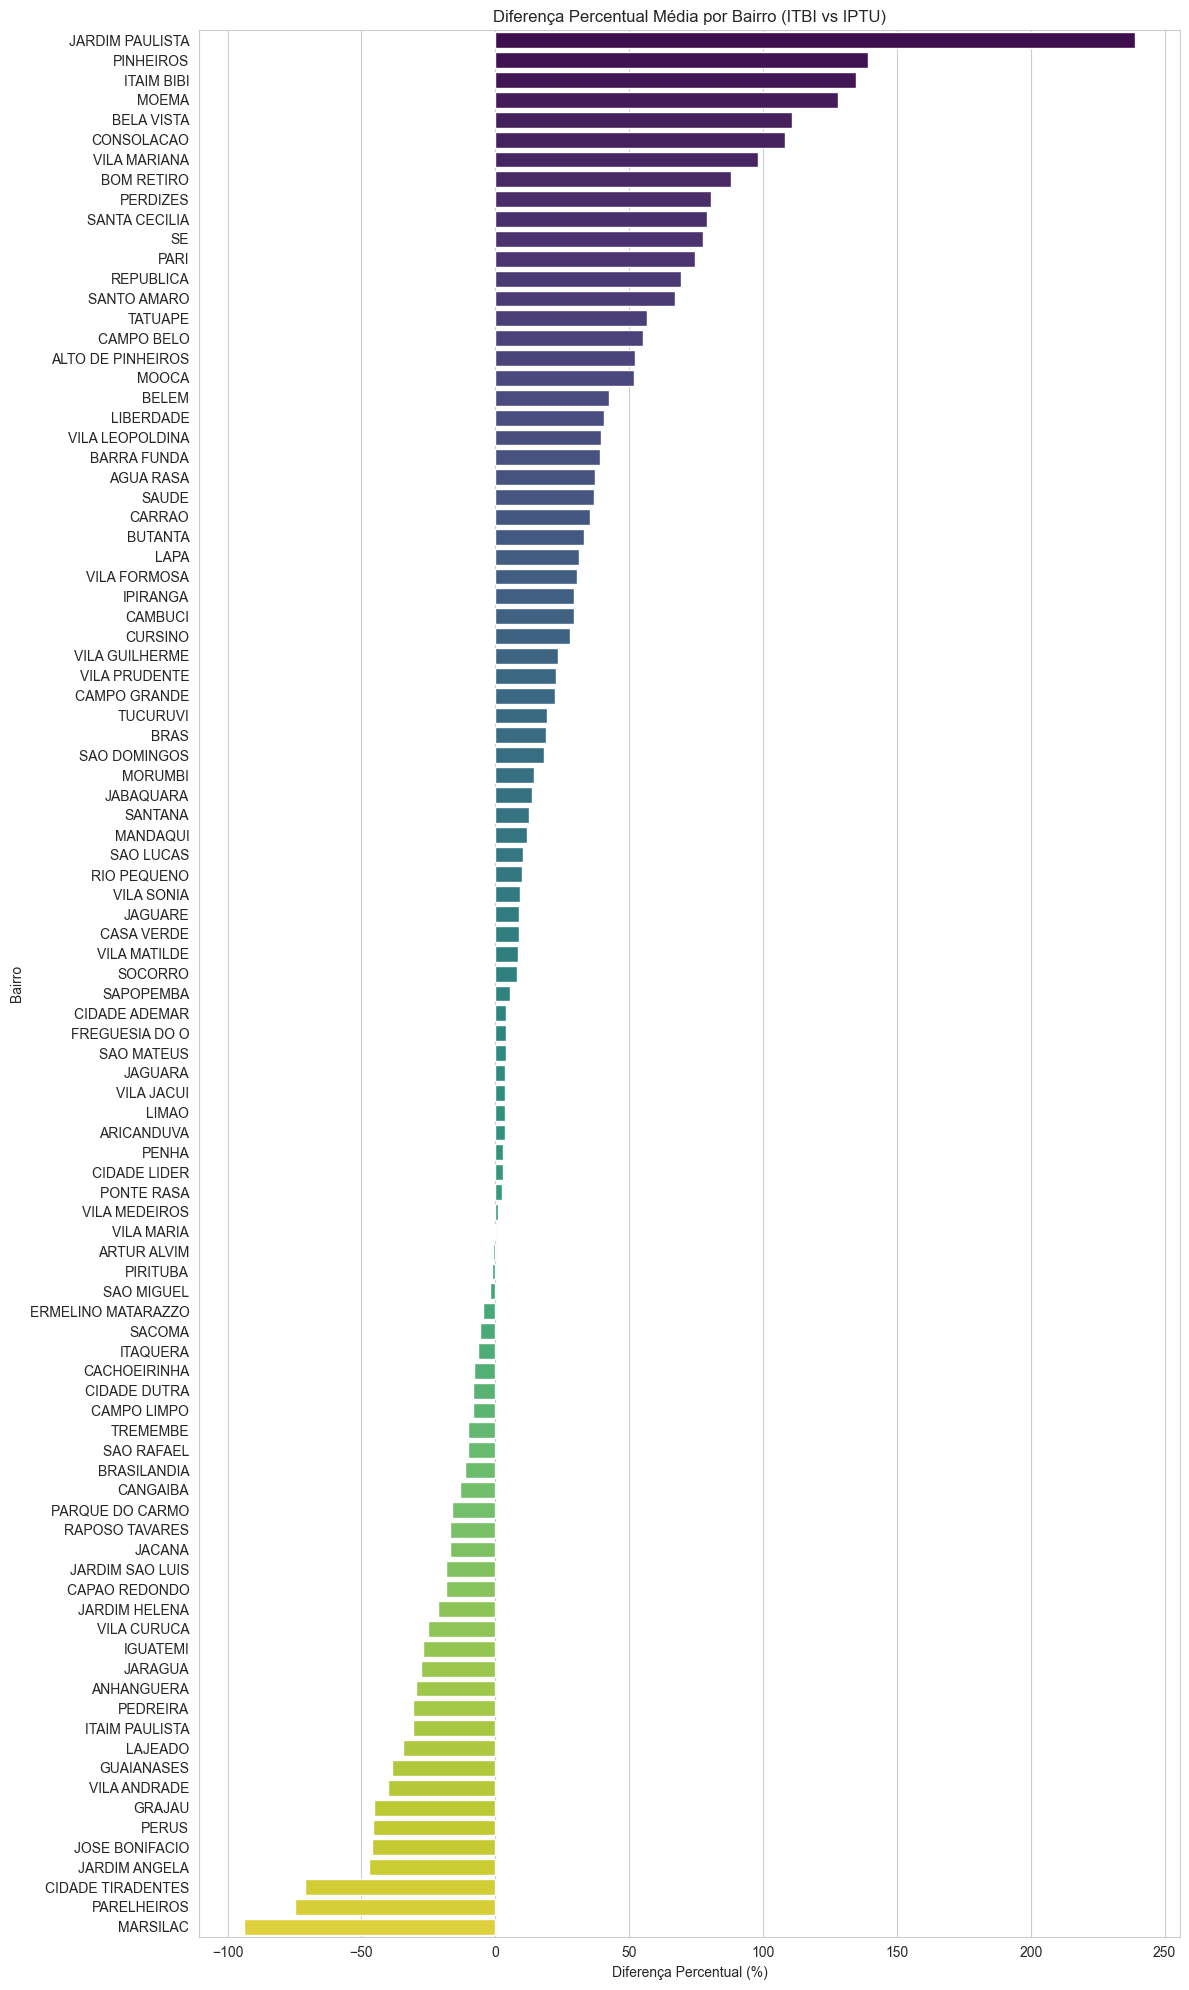

In [68]:
# 3. Realizar a junção espacial para associar cada setor ao bairro onde está contido
joined = gpd.sjoin(merged_final, bairros_filtrado, how='inner', predicate='within')

# 4. Agrupar por bairro e calcular a média da diferença percentual
avg_diff_by_bairro = joined.groupby('ds_nome')['diferenca_pct'].mean().reset_index()

# 5. Ordenar todos os bairros por diferença percentual (ordem decrescente)
avg_diff_by_bairro = avg_diff_by_bairro.sort_values(by='diferenca_pct', ascending=False)

# 6. Plotar o gráfico de barras para todos os bairros usando Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 20))  # Ajuste o tamanho conforme necessário para visualizar todos os bairros
ax = sns.barplot(x='diferenca_pct', y='ds_nome', data=avg_diff_by_bairro, palette="viridis")
ax.set_title("Diferença Percentual Média por Bairro (ITBI vs IPTU)")
ax.set_xlabel("Diferença Percentual (%)")
ax.set_ylabel("Bairro")
plt.tight_layout()
plt.savefig("diferenca_pct_por_bairro.png", dpi=300)
plt.show()